<a href="https://colab.research.google.com/github/jscienciadados/decision-tree/blob/main/Titanic_Decision_Tree_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Estudando Árvores de Decisão a partir do dataset titanic


# Gerando o Dataset

In [1]:
data(Titanic, package = "datasets")

# Dataframe

In [2]:
dataset <- as.data.frame(Titanic)

In [3]:
head(dataset)

,Class,Sex,Age,Survived,Freq
,<fct>,<fct>,<fct>,<fct>,<dbl>
1,1st,Male,Child,No,0
2,2nd,Male,Child,No,0
3,3rd,Male,Child,No,35
4,Crew,Male,Child,No,0
5,1st,Female,Child,No,0
6,2nd,Female,Child,No,0


In [5]:
# Instalando e Carregando o pacote Rpart
install.packages("rpart", dependencies = T)
library(rpart)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## Criando o Modelo

In [6]:
titanic_tree <- rpart(Survived ~ Class + Sex + Age,
                      data = dataset,
                      weights = Freq,
                      method = "class",
                      parms = list(split = "information"),
                      control = rpart.control(minsplit = 5)) 


In [7]:
# Plot
install.packages("rpart.plot")
library(rpart.plot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [8]:
titanic_tree

n= 32 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 32 711 No (0.6769650 0.3230350)  
   2) Sex=Male 16 367 No (0.7879838 0.2120162)  
     4) Age=Adult 8 338 No (0.7972406 0.2027594) *
     5) Age=Child 8  29 No (0.5468750 0.4531250)  
      10) Class=3rd 2  13 No (0.7291667 0.2708333) *
      11) Class=1st,2nd 4   0 Yes (0.0000000 1.0000000) *
   3) Sex=Female 16 126 Yes (0.2680851 0.7319149)  
     6) Class=3rd 4  90 No (0.5408163 0.4591837) *
     7) Class=1st,2nd,Crew 12  20 Yes (0.0729927 0.9270073) *

# Imprimindo a árvore antes e depois do puning

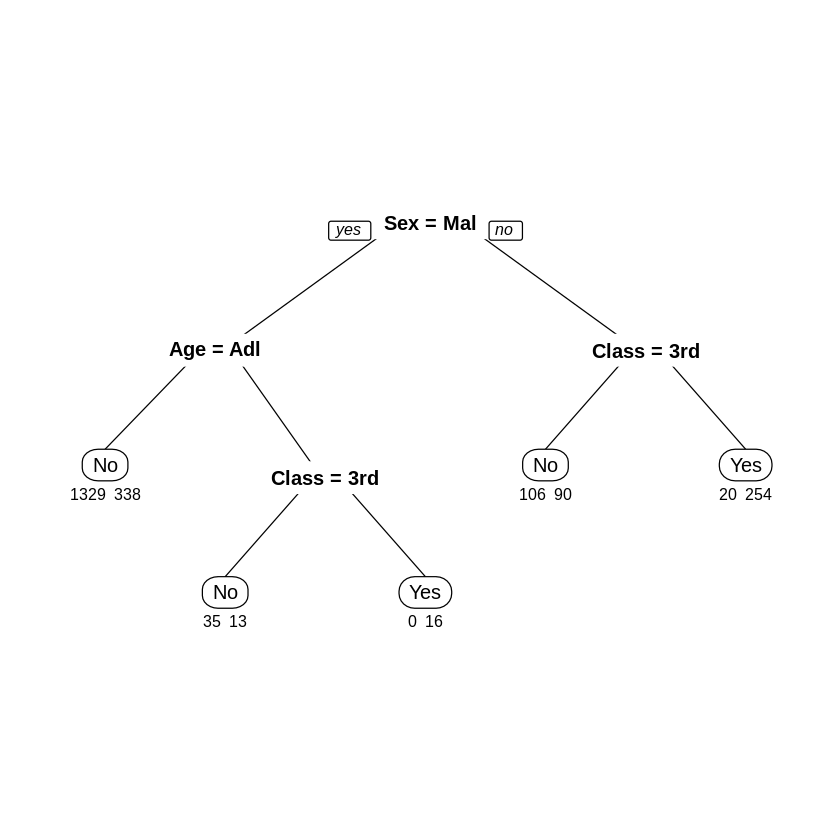

In [9]:
# Antes do Pruning
prp(titanic_tree, type = 0, extra = 1, under = TRUE, compress = TRUE)


# Pruning -> Poda da árvore

Na ciência da computação, poda é a remoção de partes de uma árvore de decisão ou de neurônios de uma rede neural. Isso pode ocorrer porque não há significativa contribuição para a precisão ou interpretabilidade da árvore, reduzindo-se a complexidade da árvore e aumentando-se a sua generalização.

In [10]:
pruned_titanic_tree <- prune(titanic_tree, cp = 0.02)
pruned_titanic_tree

n= 32 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 32 711 No (0.6769650 0.3230350)  
  2) Sex=Male 16 367 No (0.7879838 0.2120162) *
  3) Sex=Female 16 126 Yes (0.2680851 0.7319149)  
    6) Class=3rd 4  90 No (0.5408163 0.4591837) *
    7) Class=1st,2nd,Crew 12  20 Yes (0.0729927 0.9270073) *

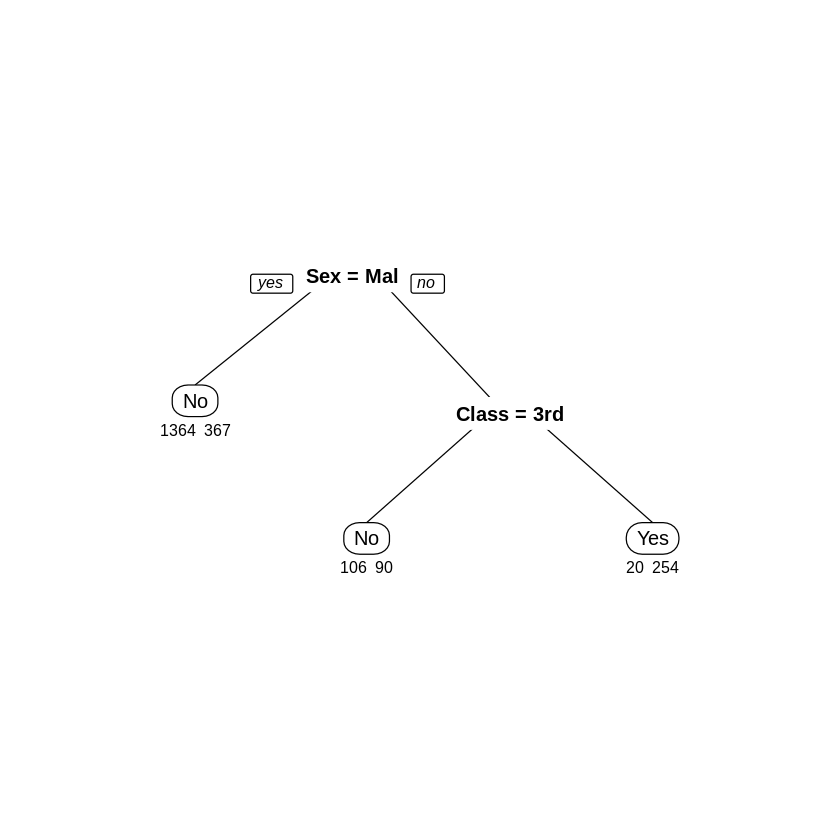

In [11]:
# Depois do Pruning
prp(pruned_titanic_tree, type = 0, extra = 1, under = TRUE, compress = TRUE)